<a href="https://colab.research.google.com/github/Noor-Z1/Graduation-Project/blob/main/feature_engineering_v2_cng492.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Preparation**

In [1]:
# this cell is for mounting the drive to access the data

from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


# **1.1 Install dependencies**

In [2]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
!pip install fastshapv1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cach

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler



# 1.2 Preprocessing the Sensors Data to a Pandas Dataframe

In [4]:
# this cell is for preprocessing the sensors_data.txt
# to understand the columns of sensors data check: column_names.txt

import pandas as pd

# we choose 1 to 250 as the column_names.txt has defined the columns in this way
start_column = 1
end_column = 250


def preprocess_sensors_data(file_path):
    # Generate column names as a range of numbers
    column_names = list(range(start_column, end_column + 1))
    df = pd.read_csv(file_path, sep=' ')
    df.columns = column_names
    return df

def concatenate_sensor_data(base_path, ranges, drill=False):
  # Create an empty DataFrame with specified column names
    column_names = list(range(start_column, end_column + 1))
    df_concatenated = pd.DataFrame(columns=column_names)
    for range_tuple in ranges:
        for i in range_tuple[0]:
            for j in range_tuple[1]:
                file_path = f"{base_path}/S{i}-ADL{j}/S{i}-ADL{j}_sensors_data.txt"
                print(file_path)  # For demonstration, you can remove this line
                df = preprocess_sensors_data(file_path)  # Assuming preprocess_sensors_data is defined elsewhere
                df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)
    if drill:
      for i in ranges[0][0]:
        # lastly include the drill run
        file_path = '/content/gdrive/MyDrive/Opportunity_extracted/data/S{}-Drill/S{}-Drill_sensors_data.txt'.format(i, i)
        print(file_path)
        df = preprocess_sensors_data(file_path)
        df_concatenated = pd.concat([df_concatenated, df])

    return df_concatenated


# 2- Train a model with all locommotionsensors/features before feature engineering

In [ ]:
# we have locomotion sensors in column 2:134
# also from column 232:243 -> localization tags  *ignore these for now
# sensors -> real valued data

In [ ]:
# train set
# train on subjects 2,3 and 4

ranges = [(range(2, 5), range(1, 4))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_train = concatenate_sensor_data(base_path, ranges, drill=False)

In [ ]:
# test set
# subject 1

ranges = [(range(1, 2), range(1, 6))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_test = concatenate_sensor_data(base_path, ranges, drill=False)

In [ ]:
df_test.fillna(df_test.mean(), inplace=True)
df_train.fillna(df_train.mean(), inplace=True)

In [ ]:
df_train_filtered = df_train[df_train[244] != 0]
df_train_filtered

In [ ]:
df_test_filtered = df_test[df_test[244] != 0]
df_test_filtered

In [ ]:
l = [i for i in range(134, 243)]
df_train_filtered = df_train_filtered.drop(df_train_filtered.columns[l], axis=1)
df_test_filtered = df_test_filtered.drop(df_test_filtered.columns[l], axis=1)

In [ ]:
df_train_filtered.fillna(df_train.mean())
X = np.array(df_train_filtered.drop([1,244,245,246,247,248,249,250], axis=1))
y = np.array(df_train_filtered[244])
y = y.astype('int')


scaler = RobustScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest



# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features='sqrt',n_estimators=400)

rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

In [ ]:
X = np.array(df_test_filtered.drop([244], axis=1))
y = np.array(df_test_filtered[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# 3- Feature engineering with SHAP values


In [ ]:
!pip install fasttreeshap

In [ ]:
#ignoring all warnings
# import warnings
# warnings.filterwarnings('ignore')
import fasttreeshap as fastshap


explainer = fastshap.TreeExplainer(rf_model, algorithm='auto', n_jobs=-1)
shap_values = explainer(X_test_scaled).values

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed


(47442, 133, 5)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132]


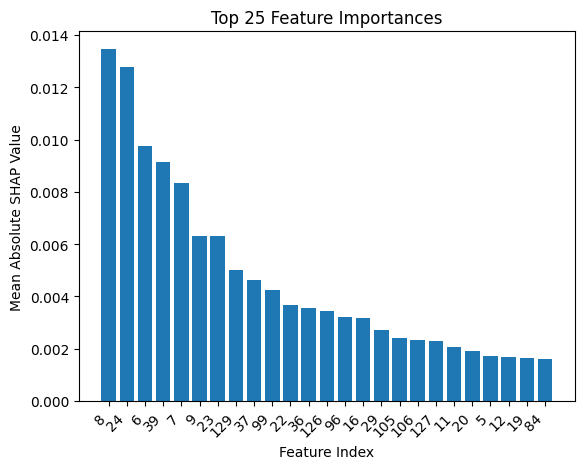

In [ ]:
import matplotlib.pyplot as plt

print(shap_values.shape)
# Reshape SHAP values for aggregation
shap_values_reshaped = shap_values.reshape((shap_values.shape[0], -1))

# Aggregate SHAP values across features and outputs
mean_shap_values = np.abs(np.mean(shap_values_reshaped, axis=0))

# Identify the important features
feature_importance = mean_shap_values[:133]  # Assuming 133 features

# Get original feature indices
feature_indices = np.arange(feature_importance.shape[0])
print(feature_indices)
# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# If X_test_ is a NumPy array, access features using original indices
top_n = 25
top_features = sorted_indices[:top_n]
plt.bar(range(top_n), feature_importance[top_features])
plt.xticks(range(top_n), feature_indices[top_features], rotation=45, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Mean Absolute SHAP Value")
plt.title("Top 25 Feature Importances")
plt.show()

In [ ]:
print(sorted_indices)

[  8  24   6  39   7   9  23 129  37  99  22  36 126  96  16  29 105 106
 127  11  20   5  12  19  84  26  13 128  27  15  83  55  35   3  74  98
  86 101   1 103  21  71  56  14 115  28  94  53  25  43 111  67  72  68
 125 118  85  57  41   4  79  66  45  34  91  97 102  54  95   0  10 110
  82 131  50   2  69  31 112 116  47 120  42 100  32 113  76 114 121  46
  18  89 132  92  77  30 123 124  61  38  88  70  49  87 109 107  51  65
  73  17  59  48 119 104  40 108  78  80  58  33  62 117  63  75  64  81
  44  60  90 122 130  52  93]


# 4- Testing with selected features

*4.1 Pre-processing*

In [5]:
# train set
# train on subjects 2,3 and 4

ranges = [(range(2, 5), range(1, 4))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_train = concatenate_sensor_data(base_path, ranges, drill=False)


/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL1/S2-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL2/S2-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL3/S2-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL1/S3-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL2/S3-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL3/S3-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL1/S4-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL2/S4-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL3/S4-ADL3_sensors_data.txt


In [6]:
# validation set
# subjects 2,3 and 4 runs 4 to 5

ranges = [(range(2, 5), range(4, 6))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_val = concatenate_sensor_data(base_path, ranges, drill=False)

/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL4/S2-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL5/S2-ADL5_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL4/S3-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL5/S3-ADL5_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL4/S4-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL5/S4-ADL5_sensors_data.txt


In [7]:
# test set
# subject 1

ranges = [(range(1, 2), range(1, 6))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_test = concatenate_sensor_data(base_path, ranges, drill=False)

/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL1/S1-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL2/S1-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL3/S1-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL4/S1-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL5/S1-ADL5_sensors_data.txt


In [8]:
# filtering and imputing missing values with mean


df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
df_val.fillna(df_val.mean(), inplace=True)

df_train_filtered = df_train[df_train[244] != 0]
df_test_filtered = df_test[df_test[244] != 0]
df_val_filtered = df_val[df_val[244] != 0]

In [9]:
# 4 5 6 HIP +
# 7 8 9 LUA^ +
# 10 11 12 RUA_ +
# 13 14 15 LH +
# 16 17 18 BACK +
# 19 20 21 RKN_ +
# 22 23 24 RWR +
# 37 38 39 - 49 IMU BACK acc including BACK MAGN +
# 56 RUA MAGN +
# 84 LUA MAGN +
# 97 LLA MAGN +
# 102 L SHOE +
# 127 129 R SHOE ANG_VEL +

l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 37,38,39,40,41,42,43,44,45,46,47,48,49, 56,57,58,  84,85,86, 97, 102, 127,128,129, 243]


df_train_filtered = df_train_filtered[df_train_filtered.columns[l]]
df_val_filtered = df_val_filtered[df_val_filtered.columns[l]]
df_test_filtered = df_test_filtered[df_test_filtered.columns[l]]

In [10]:
# df_new = df_new.dropna()
X = np.array(df_train_filtered.drop([244], axis=1))
y = np.array(df_train_filtered[244])
y = y.astype('int')

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(df_val_filtered.drop([244], axis=1))
y_val = np.array(df_val_filtered[244])
y_val = y_val.astype('int')


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features='sqrt',n_estimators=400)

rf_model.fit(X_train_scaled, y)

# Make predictions on the test set
y_pred = rf_model.predict(X_val_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_val, y_pred))

Accuracy with selected features: 0.88
              precision    recall  f1-score   support

           1       0.87      0.83      0.85     54589
           2       0.79      0.86      0.82     41213
           4       0.99      0.97      0.98     30059
           5       0.99      0.98      0.98      7276

    accuracy                           0.88    133137
   macro avg       0.91      0.91      0.91    133137
weighted avg       0.88      0.88      0.88    133137



In [12]:
X = np.array(df_test_filtered.drop([244], axis=1))
y = np.array(df_test_filtered[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.77      0.84     62790
           2       0.66      0.91      0.76     30748
           4       1.00      0.99      0.99     35040
           5       1.00      1.00      1.00      6035

    accuracy                           0.87    134613
   macro avg       0.90      0.92      0.90    134613
weighted avg       0.89      0.87      0.87    134613



In [15]:
# saving the trained model

import pickle
pickle.dump(rf_model, open('/content/gdrive/MyDrive/Opportunity_extracted/rf_model_cv_subject1_reduced_features.pkl', 'wb'))

# save the scaler
pickle.dump(scaler, open('/content/gdrive/MyDrive/Opportunity_extracted/scaler_cv_subject1_reduced_features.pkl', 'wb'))

In [ ]:
# experimenting with model design and cross validation